###  Sudipa Koner

#### Dataset used : billionaires.csv

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
bd = pd.read_csv('billionaires.csv')

In [3]:
bd.tail(4)

,name,rank,year,company.founded,company.name,company.relationship,company.sector,company.type,demographics.age,demographics.gender,...,location.gdp,location.region,wealth.type,wealth.worth in billions,wealth.how.category,wealth.how.from emerging,wealth.how.industry,wealth.how.inherited,wealth.how.was founder,wealth.how.was political
2610,Wu Xiong,1565,2014,1999,Biostime International Holdings,owner,infant formula,new,0,male,...,0.0,East Asia,executive,1.0,Traded Sectors,True,Consumer,not inherited,True,True
2611,Yang Keng,1565,2014,0,Blue Ray Corp,chairman,real estate,new,53,male,...,0.0,East Asia,self-made finance,1.0,Financial,True,Real Estate,not inherited,True,True
2612,Zdenek Bakala,1565,2014,1994,Patria Finance,founder,coal,new,53,male,...,0.0,Europe,privatized and resources,1.0,Resource Related,True,Mining and metals,not inherited,True,True
2613,Zhu Wenchen,1565,2014,1999,Furen Pharmaceutical Group,chairman,pharmaceuticals,new,48,male,...,0.0,East Asia,executive,1.0,New Sectors,True,Technology-Medical,not inherited,True,True


In [5]:
bd.shape

(2614, 22)

In [10]:
bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2614 entries, 0 to 2613
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      2614 non-null   object 
 1   rank                      2614 non-null   int64  
 2   year                      2614 non-null   int64  
 3   company.founded           2614 non-null   int64  
 4   company.name              2576 non-null   object 
 5   company.relationship      2568 non-null   object 
 6   company.sector            2591 non-null   object 
 7   company.type              2578 non-null   object 
 8   demographics.age          2614 non-null   int64  
 9   demographics.gender       2580 non-null   object 
 10  location.citizenship      2614 non-null   object 
 11  location.country code     2614 non-null   object 
 12  location.gdp              2614 non-null   float64
 13  location.region           2614 non-null   object 
 14  wealth.t

In [11]:
bd.describe()

,rank,year,company.founded,demographics.age,location.gdp,wealth.worth in billions
count,2614.000000,2614.000000,2614.000000,2614.000000,2.614000e+03,2614.000000
mean,599.672533,2008.411630,1924.711936,53.341239,1.769103e+12,3.531943
std,467.885695,7.483598,243.776546,25.333320,3.547083e+12,5.088813
min,1.000000,1996.000000,0.000000,-42.000000,0.000000e+00,1.000000
25%,215.000000,2001.000000,1936.000000,47.000000,0.000000e+00,1.400000
50%,430.000000,2014.000000,1963.000000,59.000000,0.000000e+00,2.000000
75%,988.000000,2014.000000,1985.000000,70.000000,7.250000e+11,3.500000
max,1565.000000,2014.000000,2012.000000,98.000000,1.060000e+13,76.000000


### EDA

In [6]:
bd.isna().sum()

name                         0
rank                         0
year                         0
company.founded              0
company.name                38
company.relationship        46
company.sector              23
company.type                36
demographics.age             0
demographics.gender         34
location.citizenship         0
location.country code        0
location.gdp                 0
location.region              0
wealth.type                 22
wealth.worth in billions     0
wealth.how.category          1
wealth.how.from emerging     0
wealth.how.industry          1
wealth.how.inherited         0
wealth.how.was founder       0
wealth.how.was political     0
dtype: int64

In [7]:
bd['company.relationship'].value_counts()

founder                           1214
relation                           945
owner                               94
chairman                            76
investor                            36
                                  ... 
investor/founder                     1
lawyer                               1
founder and executive chairman       1
COO                                  1
Chairman, CEO                        1
Name: company.relationship, Length: 74, dtype: int64

In [8]:
bd['company.sector'].value_counts()

real estate           177
retail                120
media                 117
construction           96
banking                93
                     ... 
flooring                1
hair care products      1
wine and spirits        1
oil refining            1
wireless products       1
Name: company.sector, Length: 520, dtype: int64

In [9]:
bd['company.type'].value_counts()

new                       2264
aquired                    196
privatization               42
 new                        34
subsidiary                   9
state owned enterprise       7
acquired                     5
new                          4
new/aquired                  3
merger                       3
 acquired                    2
franchise                    2
new, privitization           2
privatized                   1
joint venture                1
franchise rights             1
neew                         1
new division                 1
Name: company.type, dtype: int64

#### Heatmap

In [17]:
# Select numeric columns for correlation matrix
numeric_columns = bd.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

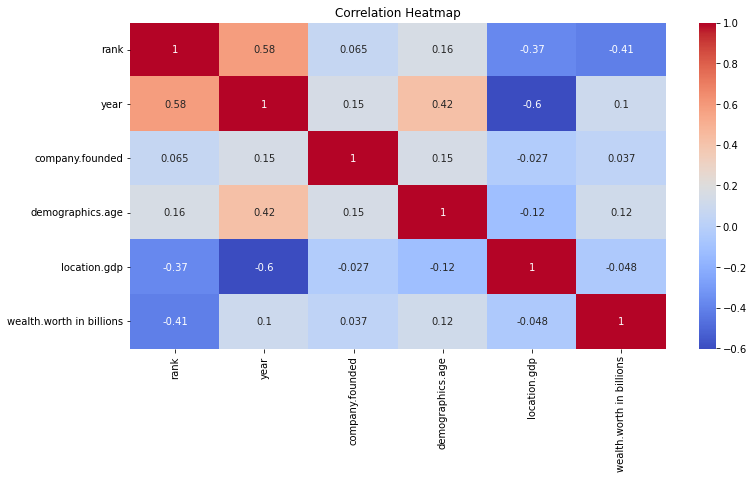

In [18]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


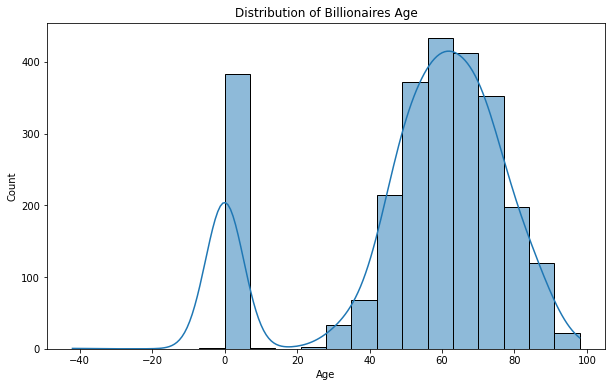

In [23]:
# Visualize the distribution of billionaires' ages
plt.figure(figsize=(10, 6))
sns.histplot(bd['demographics.age'],bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Billionaires Age')
plt.show()


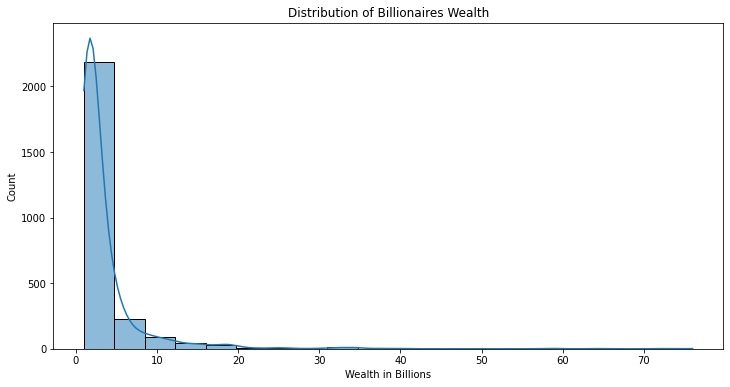

In [24]:
# Visualize the wealth distribution
plt.figure(figsize=(12, 6))
sns.histplot(bd['wealth.worth in billions'], bins=20, kde=True)
plt.xlabel('Wealth in Billions')
plt.ylabel('Count')
plt.title('Distribution of Billionaires Wealth')
plt.show()

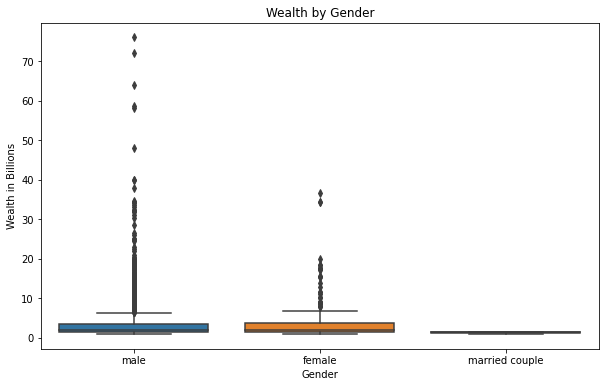

In [25]:
# Compare wealth by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='demographics.gender', y='wealth.worth in billions', data=bd)
plt.xlabel('Gender')
plt.ylabel('Wealth in Billions')
plt.title('Wealth by Gender')
plt.show()

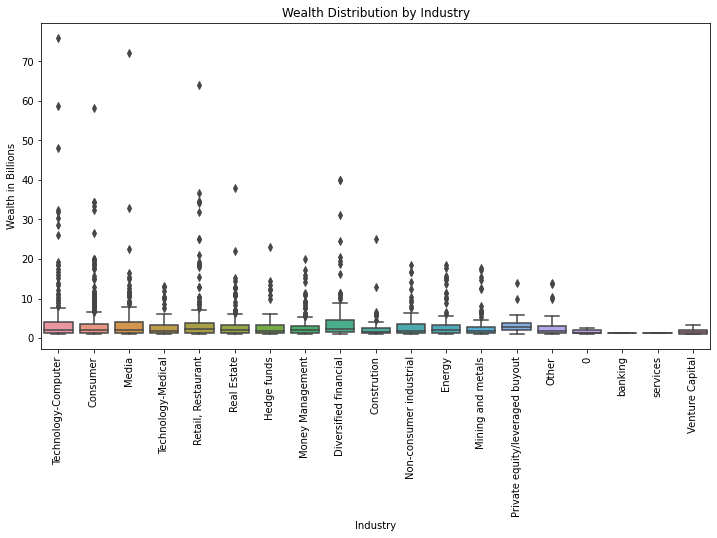

In [26]:
# Visualize wealth distribution by industry
plt.figure(figsize=(12, 6))
sns.boxplot(x='wealth.how.industry', y='wealth.worth in billions', data=bd)
plt.xlabel('Industry')
plt.ylabel('Wealth in Billions')
plt.title('Wealth Distribution by Industry')
plt.xticks(rotation=90)
plt.show()


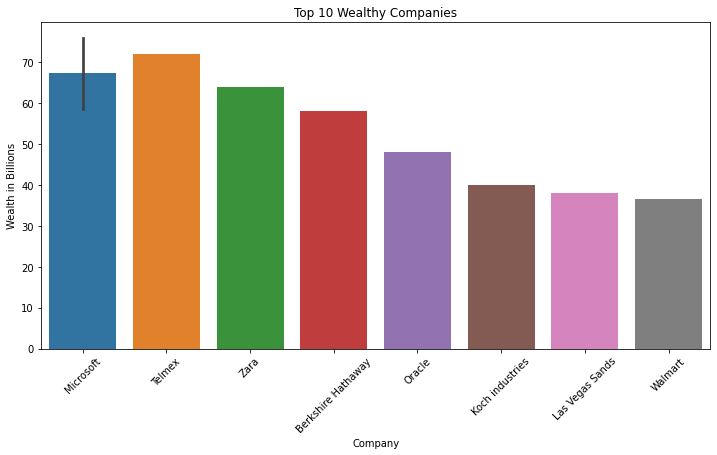

In [33]:
## Top Wealthy Companies:
top_wealthy_companies = bd.nlargest(10, 'wealth.worth in billions')[['company.name', 'wealth.worth in billions']]
plt.figure(figsize=(12, 6))
sns.barplot(x='company.name', y='wealth.worth in billions', data=top_wealthy_companies)
plt.xlabel('Company')
plt.ylabel('Wealth in Billions')
plt.title('Top 10 Wealthy Companies')
plt.xticks(rotation=45)
plt.show()


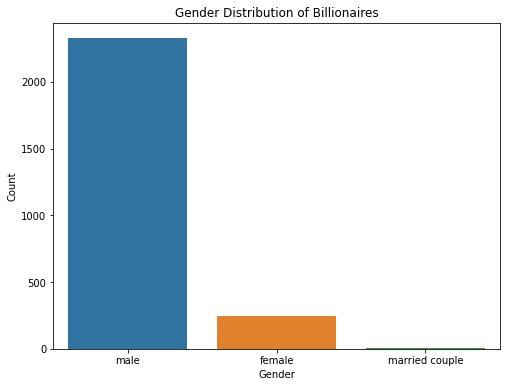

In [35]:
## Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='demographics.gender', data=bd)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution of Billionaires')
plt.show()

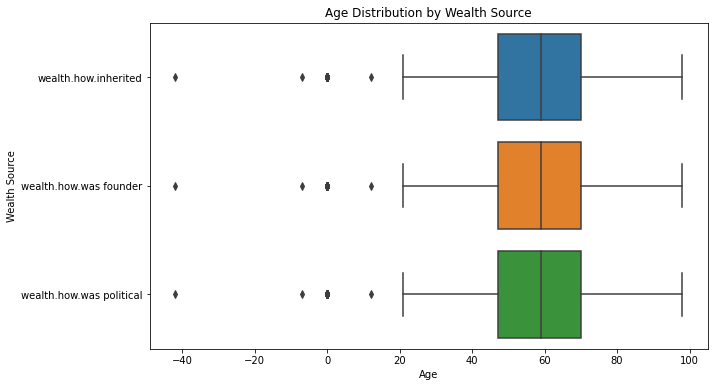

In [38]:
## Age Distribution by Wealth Source:

plt.figure(figsize=(10, 6))
sns.boxplot(x='demographics.age', y='variable', data=bd.melt(id_vars=['demographics.age'], value_vars=wealth_sources),
            orient='h')
plt.xlabel('Age')
plt.ylabel('Wealth Source')
plt.title('Age Distribution by Wealth Source')
plt.show()

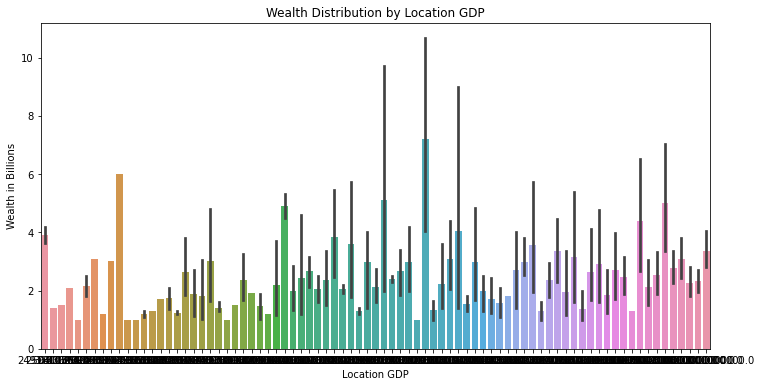

In [43]:
## Wealth Distribution by Location GDP:

plt.figure(figsize=(12, 6))
sns.barplot(x='location.gdp', y='wealth.worth in billions', data=bd)
plt.xlabel('Location GDP')
plt.ylabel('Wealth in Billions')
plt.title('Wealth Distribution by Location GDP')
plt.show()